# Solutions to the midterm exam


In [ ]:
# imports
import numpy as np
from numpy import log, sqrt, exp, abs, pi
from matplotlib.pyplot import *

# random number generator
rng = np.random.default_rng(42)

## 1(c)

In [ ]:
def sample_laplace(lam):
  u1 = rng.random()
  u2 = rng.random()
  while u2 == 0:   # make sure u2 != 0
    u2 = rng.random()
  s = 1 if u1 > 0.5 else -1
  return s * log(u2) * lam / sqrt(2)    # typo in problem sheet; no marks were taken off
print(np.array([sample_laplace(3) for i_ in range(10)]))

[-1.7469769  -0.76461292  0.05235355 -0.51063718  1.69207207  0.16133758
 -0.41384579  3.14327528 -5.83730434 -0.97452829]


## 1(d)

In [ ]:
N = 10000
def measure_sample_variance(lam):
  samples = np.array([sample_laplace(lam) for i in range(N)])
  mean = np.mean(samples)
  var = np.mean((samples - mean)**2)   # OR: var = np.var(samples)
  return var
def print_variance(lam):
  print(f'lambda={lam}  exact={lam**2}  measured={measure_sample_variance(lam):.4f}')
print_variance(1)
print_variance(3)
print_variance(5)

lambda=1  exact=1  measured=1.0114
lambda=3  exact=9  measured=9.0008
lambda=5  exact=25  measured=25.3417


## 2(a)

In [ ]:
N = 10000
p = 0.05
sigma = 0.1
lam = 1

In [ ]:
selector = rng.random(size=N) < p  # true (or 1) if Laplace is selected
s_normal = rng.normal(0, sigma, size=N)
s_laplace = np.array([sample_laplace(lam) for i_ in range(N)])
s_mix = (1-selector) * s_normal + selector * s_laplace

print(selector[:30])
print(s_normal[:30])
print(s_laplace[:30])
print(s_mix[:30])

[False False False False False False False False False  True False False
 False False False False False False False  True False False False False
  True False False False False False]
[ 0.03224798  0.17155911 -0.02304926  0.08329289  0.08185201 -0.07038479
  0.18927148  0.04289796 -0.00265341 -0.01636537 -0.11720707 -0.07894638
 -0.10229391  0.22739837  0.10370106 -0.10095069  0.18432965  0.13649829
 -0.06426804  0.05311172 -0.06816437  0.10251153  0.0492207  -0.04235257
 -0.12376078 -0.00647768  0.04915046  0.13003455  0.06290544  0.09263685]
[-0.75030215  0.11434014  0.62994825  2.07807401  1.19619999 -0.31630959
  2.89076548  0.40092405 -0.84487857 -0.35495316  0.00649126 -0.69150642
 -0.68508649 -1.69896449  0.22567071  0.00949287 -0.13223574  1.13880619
 -0.60755425 -0.33186218 -0.16015662 -0.32108709 -0.49607321 -0.04301035
 -0.08929809 -0.69305853 -0.97476921  1.04975747 -0.37696532 -0.25070223]
[ 0.03224798  0.17155911 -0.02304926  0.08329289  0.08185201 -0.07038479
  0.1892714

## 2(b)

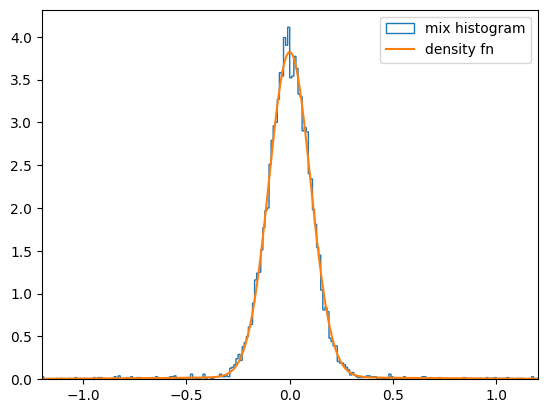

In [ ]:
#hist(s_normal, range=[-3,3], bins=600, density=True, histtype='step', label='normal')
#hist(s_laplace, range=[-3,3], bins=600, density=True, histtype='step', label='Laplace')
hist(s_mix, range=[-3,3], bins=600, density=True, histtype='step', label='mix histogram')
xx = np.linspace(-5, 5, 1000)
dens = ((1-p)*1/sqrt(2*pi*sigma**2)*exp(-xx**2/(2*sigma**2))
     + p * 1/(lam*sqrt(2)) * exp(-sqrt(2)*abs(xx) / lam))
plot(xx, dens, label='density fn')
legend()
xlim(-1.2, 1.2);

Notes: these parameters (especially the range of histogram) work with the parameters requested in part (a). In order to have a good fit of the histogram and density function for different parameters, make sure to set the histogram range such that no significant portion of the distribution falls outside; otherwise the normalization would be distrorted.

## 2(c)

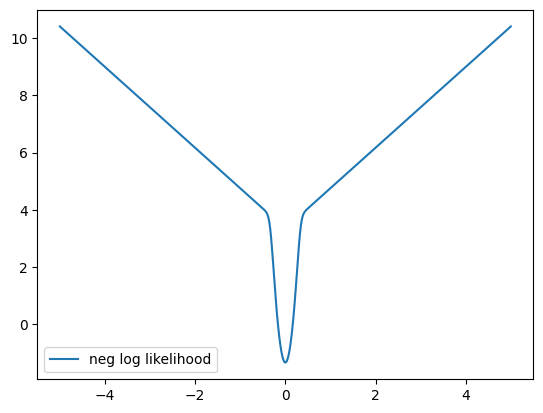

In [ ]:
plot(xx, -log(dens), label='neg log likelihood')
legend();

The negative log likelihood function of the mixture is not convex. (Even if the neg log likelihoods of the individual distributions are convex.)

## 3(a)

In [ ]:
data = np.loadtxt('hw_data.csv')
height = data[:,0]
weight_true = data[:,1]

def model(x, theta):
  return theta[0] + theta[1]*x
def error(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [ ]:
theta_plausible = [-100, 1]
print(error(weight_true, model(height, theta_plausible)))

495.5882352941176


## 3(b)

In [ ]:
Phi = np.stack(([1]*len(height), height), axis=1)
theta = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ weight_true
print(theta)

[8.00132405 0.41933592]


219.48539743100056


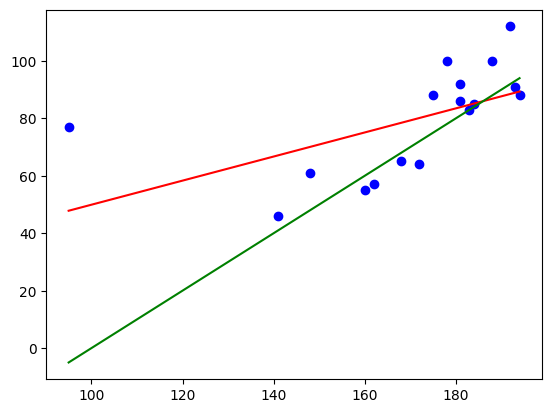

In [ ]:
plot(height, weight_true, 'bo')
hh = np.linspace(height.min(), height.max(), 100)
plot(hh, model(hh, theta), 'r-')
plot(hh, model(hh, theta_plausible), 'g-')
print(error(weight_true, model(height, theta)))

## 3(c)
The max likelihood estimator minimizes error, such that its error is smaller than the error of any other parameter set. However, it looks bad because of the outlier point distorts the fit: the estimator takes into account fully the error of the outlier point. The plausible parameter is fine for the majority of points (except the outlier), but its error is large due to the contribution of the outlier.

## 3(d)

The outlier can be treated with an error function that contains fat tail distribution. A possible solution is to assume for the error distribution a mixture like in problem 2. Then the error function to be minimized would be the log-likelihood function in 2(c).